In [2]:
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [4]:
X = sym.Symbol("x")

In [5]:
Y=+0.1*X**8-0.2*X**7+0.3*X**6-X**5+X**4-15*X+9*X**3-X**2-10

In [6]:
dY = sym.diff(Y)

d2Y = sym.diff(Y)
polyRoots = sym.solveset(Y, X)
dRoots = sym.solveset(dY, X)

d2Roots = sym.solveset(d2Y, X)

In [7]:
dRoots = sym.solveset(sym.diff(Y), X)

dRoots = [root for root in dRoots if root.is_real]

In [8]:
minima = np.array([root for root in dRoots if sym.diff(sym.diff(Y)).evalf(subs={"x": root}) > 0 ])

In [9]:
minima

array([-1.11591693222185, 0.773510942505233], dtype=object)

In [10]:
temp = np.array([(root, Y.evalf(subs={"x":root})) for root in minima])

globalminima = [t[0] for t in temp if t[1] is min(temp[:,1])]

plotting the function

In [11]:
x = np.linspace(-2, 2, 1000)

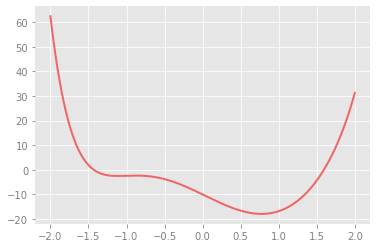

In [12]:
plt.plot(x, eval(str(Y)))

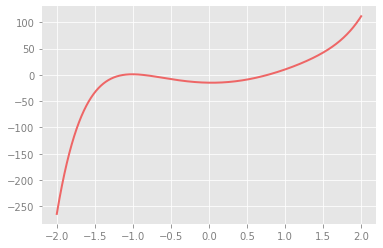

In [13]:
plt.plot(x, eval(str(sym.diff(Y))))

In [14]:
def gradientDescentSym(Y,point=0, mingrad=0.1, learning_rate=0.1, trace=False, max_iterations=1000):

  if trace:
    tracegrad = []
    tracepoint = [point]
  grad = mingrad

  iteration=0
  while np.abs(grad) >= mingrad and iteration < max_iterations :
    iteration+=1
    grad = sym.diff(Y).evalf(subs={"x":point})
    point -= learning_rate*grad*point
    print(point, grad)
    if trace:
      tracegrad.append(grad)
      tracepoint.append(point)
    
  if trace:
    return tracegrad, tracepoint
  return point

Learning rate = 0.1, mingrad=0.1

In [15]:
grads, points = gradientDescentSym(Y, point=1, trace=True)

-0.0200000000000000 10.2000000000000
-0.0498984656117013 -14.9492328058506
-0.123915381868282 -14.8335054693994
-0.301689734900029 -14.3464314398607
-0.666618503709096 -12.0961612740981
-0.949757965847410 -4.24739878300578
-0.875384691712773 0.783076076316756
-0.879659115954654 -0.0488290951663491


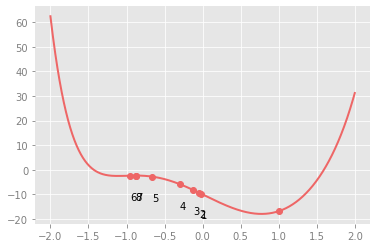

In [16]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]-10))

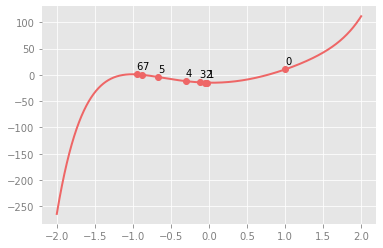

In [17]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [18]:
print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")

Minima point: -0.879659115954654 after 8 iterations. Precision (Global): 1.65317005845989. Precision (Local): 0.236257816267192


In [19]:
grads, points = gradientDescentSym(Y, point=1, learning_rate=0.001, trace=True)

0.989800000000000 10.2000000000000
0.980208511259567 9.69033010753010
0.971175513186634 9.21538424648548
0.962656445435422 8.77191366085731
0.954611462365171 8.35706560569731
0.947004809056514 7.96832387682691
0.939804295954462 7.60345991191547
0.932980854099880 7.26049230031627
0.926508156643536 6.93765303746603
0.920362295210222 6.63335923083361
0.914521501911932 6.34618924383023
0.908965909555957 6.07486247656339
0.903677343971582 5.81822214538180
0.898639143473449 5.57522054939480
0.893836001354623 5.34490641066537
0.889253828006263 5.12641395224087
0.884879629830377 4.91895343952993
0.880701402575500 4.72180295943462
0.876708037104156 4.53430125087291
0.872889235912391 4.35584143197658
0.869235438978890 4.18586549492927
0.865737757734480 4.02385946035390
0.862387916120471 3.86934910032683
0.859178197852867 3.72189615323438
0.856101399134169 3.58109496538338
0.853150786159587 3.44656950399365
0.850320056853286 3.31797069430515
0.847603306345677 3.19497404031895
0.844994995766884 3.

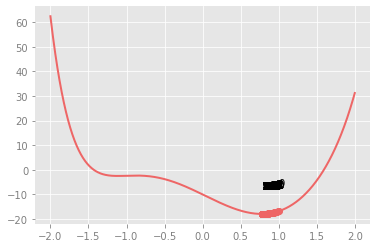

In [20]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

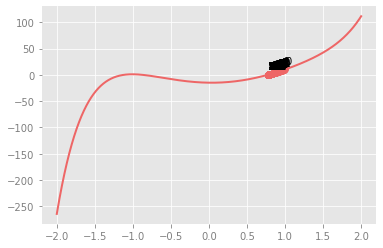

In [21]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [22]:
print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")

Minima point: 0.775872626993083 after 134 iterations. Precision (Global): 0.00236168448785057. Precision (Local): 0.00236168448785057


learning rate=1

In [23]:
grads, points = gradientDescentSym(Y, point=1, learning_rate=1, trace=True, max_iterations=500)

-9.20000000000000 10.2000000000000
-50295951.0947348 -5466950.20594944
-3.27607776797630e+61 -6.51360138673121e+53
-1.06150882089888e+492 -3.24018199834920e+430
-1.28967073866245e+3936 -1.21494114158219e+3444
-6.12238670062153e+31488 -4.74724789597940e+27552
-1.57926875215900e+251910 -2.57949853445009e+220421
-3.09555358436117e+2015281 -1.96011830166923e+1763371
-6.74522740414946e+16122251 -2.17900521516621e+14106970
-3.42817318191466e+128978014 -5.08236857930950e+112855762
-1.52613169645628e+1031824116 -4.45173454044678e+902846101
-2.35410638881403e+8254592929 -1.54253161393629e+7222768813
-7.54568505884009e+66036743434 -3.20532882230590e+57782150505
-8.40774215694117e+528293947478 -1.11424504089144e+462257204044
-1.99767605289684e+4226351579831 -2.37599585668504e+3698057632352
-2.02903947052794e+33810812638650 -1.01569995174424e+29584461058819
-2.29833827681854e+270486501109202 -1.13272231033560e+236675688470552
-6.22875984070462e+2163892008873618 -2.71011447859048e+1893405507764416


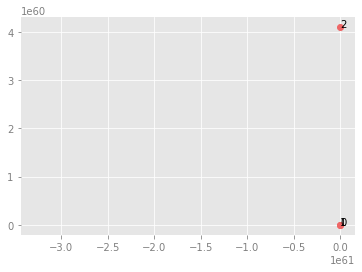

In [24]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

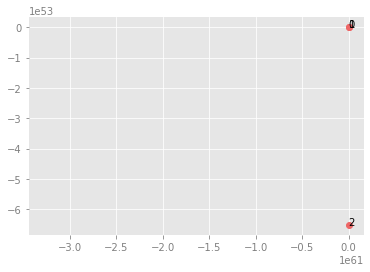

In [25]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [26]:
print(f"Minima point: {repr(points[-1])} after {len(grads)} iterations. Precision (Global): {repr(np.abs(points[-1] - globalminima[0]))}. Precision (Local): {repr(min([np.abs(points[-1] - root) for root in minima]))}")


Minima point: -1.05273672822725e+4213173202244930492995097603163503075622340082541295828528684465634711000538898427547865744050388485297026113021985671607099530433633229365884401811424662714461318306923157084635267712927763449765969536462306870769950470317045344520785877669598061425900006009720861425950559386561261892951218005070179768913988625612630353536374541335779996756922985939106908951635990065734467008655537966349489696447191602452161186279475103251013821914651498171606204 after 500 iterations. Precision (Global): 1.05273672822725e+4213173202244930492995097603163503075622340082541295828528684465634711000538898427547865744050388485297026113021985671607099530433633229365884401811424662714461318306923157084635267712927763449765969536462306870769950470317045344520785877669598061425900006009720861425950559386561261892951218005070179768913988625612630353536374541335779996756922985939106908951635990065734467008655537966349489696447191602452161186279475103251013821914651498171606204. Pr

In [27]:
grads, points = gradientDescentSym(Y, point=1,learning_rate=0.05,mingrad=1, trace=True)

0.490000000000000 10.2000000000000
0.717312237805626 -9.27805052267861
0.794790702323636 -2.16024376650897
0.760716680455545 0.857433831786729


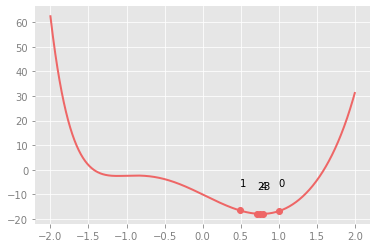

In [28]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

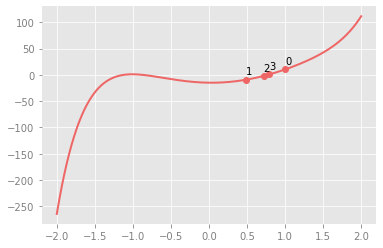

In [29]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))


In [30]:
print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")

Minima point: 0.760716680455545 after 4 iterations. Precision (Global): 0.0127942620496879. Precision (Local): 0.0127942620496879
